In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns


## Uploading the dataframes

In [2]:
app_rec = pd.read_csv ("file:///Users/genevauy/Documents/GitHub/Midterms/application_record.csv")
credit_record = pd.read_csv ("file:///Users/genevauy/Documents/GitHub/Midterms/credit_record.csv")

In [3]:
app_rec

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
credit_record["ID"].nunique ()

45985

#### Dropping Duplicates

In [6]:
app_rec = app_rec.drop_duplicates()

#### Checking for null_values

In [7]:
app_rec.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

##### Drop column with huge null values

In [8]:
app_rec = app_rec.drop("OCCUPATION_TYPE", axis=1).reset_index(drop=True)

### cred_rec

In [9]:
### grouping cred_record
credit_record['Months from today'] = credit_record['MONTHS_BALANCE']*-1
credit_record = credit_record.sort_values(['ID','Months from today'], ascending=True)

In [10]:
credit_record

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,25
1048571,5150487,-26,C,26
1048572,5150487,-27,C,27
1048573,5150487,-28,C,28


In [11]:
credit_record['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
credit_record['STATUS'] = credit_record['STATUS'].astype('int')
credit_record['STATUS'] = credit_record['STATUS'].apply(lambda x:1 if x >= 2 else 0)
credit_record['STATUS'].value_counts(normalize=True)

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

### Groupby and aggregating by max

In [12]:
cred_rec = credit_record.groupby("ID").max().reset_index()

In [13]:
cred_rec

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59
...,...,...,...,...
45980,5150482,-11,0,28
45981,5150483,0,0,17
45982,5150484,0,0,12
45983,5150485,0,0,1


In [14]:
#Dropping MONTHS_BALANCE and Months from today
cred_rec = cred_rec.drop(["MONTHS_BALANCE", "Months from today"], axis=1)

In [15]:
cred_rec

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


### Outliers Removal

In [16]:
# there are three outliers 'chilren_count','annual_income','family_size'
q_hi = app_rec['CNT_CHILDREN'].quantile(0.999)
q_low = app_rec['CNT_CHILDREN'].quantile(0.001)
app_rec = app_rec[(app_rec['CNT_CHILDREN']>q_low) & (app_rec['CNT_CHILDREN']<q_hi)]
q_hi = app_rec['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app_rec['AMT_INCOME_TOTAL'].quantile(0.001)
app_rec = app_rec[(app_rec['AMT_INCOME_TOTAL']>q_low) & (app_rec['AMT_INCOME_TOTAL']<q_hi)]
q_hi = app_rec['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app_rec['CNT_FAM_MEMBERS'].quantile(0.001)
app_rec = app_rec[(app_rec['CNT_FAM_MEMBERS']>q_low) & (app_rec['CNT_FAM_MEMBERS']<q_hi)]

In [17]:
app_rec

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
29,5008838,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0
30,5008839,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0
31,5008840,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0
32,5008841,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0
33,5008842,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438536,6837264,F,N,N,2,90000.0,State servant,Higher education,Single / not married,House / apartment,-16062,-1275,1,0,0,0,4.0
438539,6837454,M,Y,Y,1,162000.0,State servant,Secondary / secondary special,Married,House / apartment,-10890,-2675,1,0,0,0,3.0
438542,6837905,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,3.0
438543,6837906,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,3.0


### Merging the two dataframes

In [18]:
# Merge the data frames based on the 'ID' column until the last data in the "application" dataframe
merged_rec = app_rec.merge(cred_rec, on='ID', how='inner')

# Print the merged data frame
merged_rec

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008838,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
1,5008839,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
2,5008840,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
3,5008841,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
4,5008842,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,5142964,M,N,N,1,180000.0,Working,Secondary / secondary special,Married,House / apartment,-10656,-926,1,1,1,0,3.0,1
9512,5142972,M,N,N,1,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10656,-926,1,1,1,0,3.0,1
9513,5143342,M,N,N,1,216000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12946,-2418,1,0,0,1,3.0,1
9514,5145846,F,N,Y,1,256500.0,State servant,Higher education,Married,House / apartment,-17594,-1315,1,0,1,0,3.0,1


### Because there are a lot of duplicates in the credit df, we drop those duplicates.

In [19]:
merged_rec = merged_rec.drop_duplicates("ID")

In [20]:
merged_rec.reset_index(drop=True)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008838,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
1,5008839,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
2,5008840,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
3,5008841,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
4,5008842,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,5142964,M,N,N,1,180000.0,Working,Secondary / secondary special,Married,House / apartment,-10656,-926,1,1,1,0,3.0,1
9512,5142972,M,N,N,1,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10656,-926,1,1,1,0,3.0,1
9513,5143342,M,N,N,1,216000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12946,-2418,1,0,0,1,3.0,1
9514,5145846,F,N,Y,1,256500.0,State servant,Higher education,Married,House / apartment,-17594,-1315,1,0,1,0,3.0,1


In [21]:
merged_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9515
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   object 
 2   FLAG_OWN_CAR         9516 non-null   object 
 3   FLAG_OWN_REALTY      9516 non-null   object 
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   object 
 7   NAME_EDUCATION_TYPE  9516 non-null   object 
 8   NAME_FAMILY_STATUS   9516 non-null   object 
 9   NAME_HOUSING_TYPE    9516 non-null   object 
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  FLAG_MOBIL           9516 non-null   int64  
 13  FLAG_WORK_PHONE      9516 non-null   int64  
 14  FLAG_PHONE           9516 non-null   int64  
 15  FLAG_EMAIL           9516 non-null   i

### applying uniformity through lowercasing the column names

In [22]:
merged_rec = merged_rec.rename(columns=str.lower)

### checking for the unique values in every columns

In [23]:
import pandas as pd

for column in merged_rec.columns:
    unique_values = merged_rec[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'id':
[5008838 5008839 5008840 ... 5143342 5145846 5149190]

Unique values in column 'code_gender':
['M' 'F']

Unique values in column 'flag_own_car':
['N' 'Y']

Unique values in column 'flag_own_realty':
['Y' 'N']

Unique values in column 'cnt_children':
[1 2 3]

Unique values in column 'amt_income_total':
[405000.  135000.  211500.  126000.  225000.  216000.  157500.  202500.
 450000.  180000.  765000.  270000.   76500.   67500.  112500.  144000.
 445500.  427500.   90000.   99000.  360000.  306000.  562500.  315000.
 247500.   72000.  292500.  139500.  697500.  198000.  675000.  166500.
 472500.  121500.  189000.  337500.  243000.  630000.  103500.  207000.
  94500.   54000.  720000.  117000.   45000.   81000.  119250.  495000.
 220500.   85500.  184500.  148500.  108000.   65250.  139050.  175500.
 145350.  173250.  531000.  171000.  130500.  283500.  118350.  252000.
 133650.  265500.  238500.  351000.  382500.  193500.  810000.  261000.
 256500.   69750.  

In [24]:
merged_rec.columns.tolist()

['id',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'days_birth',
 'days_employed',
 'flag_mobil',
 'flag_work_phone',
 'flag_phone',
 'flag_email',
 'cnt_fam_members',
 'status']

### Changing name and values

In [25]:
merged_rec

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members,status
0,5008838,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
1,5008839,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
2,5008840,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
3,5008841,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
4,5008842,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,5142964,M,N,N,1,180000.0,Working,Secondary / secondary special,Married,House / apartment,-10656,-926,1,1,1,0,3.0,1
9512,5142972,M,N,N,1,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10656,-926,1,1,1,0,3.0,1
9513,5143342,M,N,N,1,216000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12946,-2418,1,0,0,1,3.0,1
9514,5145846,F,N,Y,1,256500.0,State servant,Higher education,Married,House / apartment,-17594,-1315,1,0,1,0,3.0,1


In [26]:
merged_rec["name_family_status"] = merged_rec["name_family_status"].replace("Civil marriage", "Married")

In [27]:
new_names = {
    "code_gender": "gender",
    "flag_own_car": "car_owned",
    "flag_own_realty": "property_owned",
    "cnt_children": "children_count",
    "amt_income_total": "annual_income",
    "name_income_type": "income_type",
    "name_education_type": "education_level",
    "name_family_status": "marital_status",
    "name_housing_type": "housing_type",
    "days_birth": "days_from_birth",
    "days_employed": "days_from_employment",
    "flag_mobil": "owned_mobile",
    "flag_work_phone": "owned_workphone",
    "flag_phone": "owned_phone",
    "flag_email": "owned_email",
    "cnt_fam_members": "family_size"
}

# Rename the columns using the rename() function
merged_rec = merged_rec.rename(columns=new_names)


In [28]:
merged_rec

,id,gender,car_owned,property_owned,children_count,annual_income,income_type,education_level,marital_status,housing_type,days_from_birth,days_from_employment,owned_mobile,owned_workphone,owned_phone,owned_email,family_size,status
0,5008838,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
1,5008839,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
2,5008840,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
3,5008841,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
4,5008842,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-11842,-2016,1,0,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,5142964,M,N,N,1,180000.0,Working,Secondary / secondary special,Married,House / apartment,-10656,-926,1,1,1,0,3.0,1
9512,5142972,M,N,N,1,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10656,-926,1,1,1,0,3.0,1
9513,5143342,M,N,N,1,216000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12946,-2418,1,0,0,1,3.0,1
9514,5145846,F,N,Y,1,256500.0,State servant,Higher education,Married,House / apartment,-17594,-1315,1,0,1,0,3.0,1


In [29]:
for column in merged_rec.columns:
    unique_values = merged_rec[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


Unique values in column 'id':
[5008838 5008839 5008840 ... 5143342 5145846 5149190]

Unique values in column 'gender':
['M' 'F']

Unique values in column 'car_owned':
['N' 'Y']

Unique values in column 'property_owned':
['Y' 'N']

Unique values in column 'children_count':
[1 2 3]

Unique values in column 'annual_income':
[405000.  135000.  211500.  126000.  225000.  216000.  157500.  202500.
 450000.  180000.  765000.  270000.   76500.   67500.  112500.  144000.
 445500.  427500.   90000.   99000.  360000.  306000.  562500.  315000.
 247500.   72000.  292500.  139500.  697500.  198000.  675000.  166500.
 472500.  121500.  189000.  337500.  243000.  630000.  103500.  207000.
  94500.   54000.  720000.  117000.   45000.   81000.  119250.  495000.
 220500.   85500.  184500.  148500.  108000.   65250.  139050.  175500.
 145350.  173250.  531000.  171000.  130500.  283500.  118350.  252000.
 133650.  265500.  238500.  351000.  382500.  193500.  810000.  261000.
 256500.   69750.  153000.  6

## Dividing the DataFrame into numerical and categorical

In [30]:
categorical = merged_rec.select_dtypes(include=['object'])

numerical = merged_rec.select_dtypes(include=['int', 'float'])

In [31]:
categorical

,gender,car_owned,property_owned,income_type,education_level,marital_status,housing_type
0,M,N,Y,Commercial associate,Higher education,Married,House / apartment
1,M,N,Y,Commercial associate,Higher education,Married,House / apartment
2,M,N,Y,Commercial associate,Higher education,Married,House / apartment
3,M,N,Y,Commercial associate,Higher education,Married,House / apartment
4,M,N,Y,Commercial associate,Higher education,Married,House / apartment
...,...,...,...,...,...,...,...
9511,M,N,N,Working,Secondary / secondary special,Married,House / apartment
9512,M,N,N,Working,Secondary / secondary special,Single / not married,House / apartment
9513,M,N,N,Working,Secondary / secondary special,Married,Municipal apartment
9514,F,N,Y,State servant,Higher education,Married,House / apartment


In [32]:
numerical.columns.tolist()

['id',
 'children_count',
 'annual_income',
 'days_from_birth',
 'days_from_employment',
 'owned_mobile',
 'owned_workphone',
 'owned_phone',
 'owned_email',
 'family_size',
 'status']

In [33]:
numerical

,id,children_count,annual_income,days_from_birth,days_from_employment,owned_mobile,owned_workphone,owned_phone,owned_email,family_size,status
0,5008838,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
1,5008839,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
2,5008840,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
3,5008841,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
4,5008842,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
9511,5142964,1,180000.0,-10656,-926,1,1,1,0,3.0,1
9512,5142972,1,180000.0,-10656,-926,1,1,1,0,3.0,1
9513,5143342,1,216000.0,-12946,-2418,1,0,0,1,3.0,1
9514,5145846,1,256500.0,-17594,-1315,1,0,1,0,3.0,1


In [34]:
numerical.reset_index(drop=True, inplace=True)

#### Apply encoders for the categorical columns

In [35]:
ordinal_columns = ['education_level']

nominal_columns = [col for col in categorical.columns if col not in ordinal_columns]

# Create the ordinal DataFrame
ordinal = categorical[ordinal_columns]

# Create the nominal DataFrame
nominal = categorical[nominal_columns]

# Print the ordinal and nominal columns
print("Ordinal columns:")
print(ordinal.columns.tolist())
print("\nNominal columns:")
print(nominal.columns.tolist())

Ordinal columns:
['education_level']

Nominal columns:
['gender', 'car_owned', 'property_owned', 'income_type', 'marital_status', 'housing_type']


In [36]:
nominal

,gender,car_owned,property_owned,income_type,marital_status,housing_type
0,M,N,Y,Commercial associate,Married,House / apartment
1,M,N,Y,Commercial associate,Married,House / apartment
2,M,N,Y,Commercial associate,Married,House / apartment
3,M,N,Y,Commercial associate,Married,House / apartment
4,M,N,Y,Commercial associate,Married,House / apartment
...,...,...,...,...,...,...
9511,M,N,N,Working,Married,House / apartment
9512,M,N,N,Working,Single / not married,House / apartment
9513,M,N,N,Working,Married,Municipal apartment
9514,F,N,Y,State servant,Married,House / apartment


In [37]:
ordinal

,education_level
0,Higher education
1,Higher education
2,Higher education
3,Higher education
4,Higher education
...,...
9511,Secondary / secondary special
9512,Secondary / secondary special
9513,Secondary / secondary special
9514,Higher education


### Applying Encoders

#### Used Label Encoder on Nominal

In [38]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called 'nominal'
le1 = LabelEncoder()
nominal_encoded = nominal.apply(le1.fit_transform)

nominal_encoded

,gender,car_owned,property_owned,income_type,marital_status,housing_type
0,1,0,1,0,0,1
1,1,0,1,0,0,1
2,1,0,1,0,0,1
3,1,0,1,0,0,1
4,1,0,1,0,0,1
...,...,...,...,...,...,...
9511,1,0,0,4,0,1
9512,1,0,0,4,2,1
9513,1,0,0,4,0,2
9514,0,0,1,2,0,1


In [39]:
nominal_encoded.isna().sum()

gender            0
car_owned         0
property_owned    0
income_type       0
marital_status    0
housing_type      0
dtype: int64

#### Used Ordinal Encoder on Ordinal

In [40]:

education_level_hierarchy = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']

encoder = OrdinalEncoder(categories=[education_level_hierarchy])

ordinal_encoded = pd.DataFrame(encoder.fit_transform(merged_rec[['education_level']]), columns=['education_encoded']).astype(int)

In [41]:
ordinal_encoded

,education_encoded
0,3
1,3
2,3
3,3
4,3
...,...
9511,1
9512,1
9513,1
9514,3


In [42]:
ordinal_encoded.isna().sum()

education_encoded    0
dtype: int64

### Concatenate ordinal_encoded and nominal_encoded as categorical_encoded

In [43]:
ordinal_encoded.reset_index(drop=True, inplace=True)
nominal_encoded.reset_index(drop=True, inplace=True)


In [44]:
print(ordinal_encoded.isna().sum())
print(nominal_encoded.isna().sum())


education_encoded    0
dtype: int64
gender            0
car_owned         0
property_owned    0
income_type       0
marital_status    0
housing_type      0
dtype: int64


In [45]:
categorical_encoded = pd.concat([ordinal_encoded, nominal_encoded], axis=1)


In [46]:
categorical_encoded

,education_encoded,gender,car_owned,property_owned,income_type,marital_status,housing_type
0,3,1,0,1,0,0,1
1,3,1,0,1,0,0,1
2,3,1,0,1,0,0,1
3,3,1,0,1,0,0,1
4,3,1,0,1,0,0,1
...,...,...,...,...,...,...,...
9511,1,1,0,0,4,0,1
9512,1,1,0,0,4,2,1
9513,1,1,0,0,4,0,2
9514,3,0,0,1,2,0,1


### Concatenate categorical_encoded and numerical

In [47]:
cred_approval_df = pd.concat([categorical_encoded, numerical], axis=1)

In [48]:
cred_approval_df

,education_encoded,gender,car_owned,property_owned,income_type,marital_status,housing_type,id,children_count,annual_income,days_from_birth,days_from_employment,owned_mobile,owned_workphone,owned_phone,owned_email,family_size,status
0,3,1,0,1,0,0,1,5008838,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
1,3,1,0,1,0,0,1,5008839,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
2,3,1,0,1,0,0,1,5008840,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
3,3,1,0,1,0,0,1,5008841,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
4,3,1,0,1,0,0,1,5008842,1,405000.0,-11842,-2016,1,0,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,1,1,0,0,4,0,1,5142964,1,180000.0,-10656,-926,1,1,1,0,3.0,1
9512,1,1,0,0,4,2,1,5142972,1,180000.0,-10656,-926,1,1,1,0,3.0,1
9513,1,1,0,0,4,0,2,5143342,1,216000.0,-12946,-2418,1,0,0,1,3.0,1
9514,3,0,0,1,2,0,1,5145846,1,256500.0,-17594,-1315,1,0,1,0,3.0,1


In [49]:
cred_approval_df.isna().sum()

education_encoded       0
gender                  0
car_owned               0
property_owned          0
income_type             0
marital_status          0
housing_type            0
id                      0
children_count          0
annual_income           0
days_from_birth         0
days_from_employment    0
owned_mobile            0
owned_workphone         0
owned_phone             0
owned_email             0
family_size             0
status                  0
dtype: int64

In [50]:
cred_approval_df['family_size'] = cred_approval_df['family_size'].astype(int)

In [51]:
cred_approval_df.columns.tolist()

['education_encoded',
 'gender',
 'car_owned',
 'property_owned',
 'income_type',
 'marital_status',
 'housing_type',
 'id',
 'children_count',
 'annual_income',
 'days_from_birth',
 'days_from_employment',
 'owned_mobile',
 'owned_workphone',
 'owned_phone',
 'owned_email',
 'family_size',
 'status']

# X-Y SPLIT

In [52]:
X = cred_approval_df.iloc[:,1:-1]
y = cred_approval_df.iloc[:,-1]

In [53]:
X

,gender,car_owned,property_owned,income_type,marital_status,housing_type,id,children_count,annual_income,days_from_birth,days_from_employment,owned_mobile,owned_workphone,owned_phone,owned_email,family_size
0,1,0,1,0,0,1,5008838,1,405000.0,-11842,-2016,1,0,0,0,3
1,1,0,1,0,0,1,5008839,1,405000.0,-11842,-2016,1,0,0,0,3
2,1,0,1,0,0,1,5008840,1,405000.0,-11842,-2016,1,0,0,0,3
3,1,0,1,0,0,1,5008841,1,405000.0,-11842,-2016,1,0,0,0,3
4,1,0,1,0,0,1,5008842,1,405000.0,-11842,-2016,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,1,0,0,4,0,1,5142964,1,180000.0,-10656,-926,1,1,1,0,3
9512,1,0,0,4,2,1,5142972,1,180000.0,-10656,-926,1,1,1,0,3
9513,1,0,0,4,0,2,5143342,1,216000.0,-12946,-2418,1,0,0,1,3
9514,0,0,1,2,0,1,5145846,1,256500.0,-17594,-1315,1,0,1,0,3


In [54]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9511    1
9512    1
9513    1
9514    1
9515    1
Name: status, Length: 9516, dtype: int64

### Train-Test Split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.3, random_state=42)

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# we have addressed the issue of oversampling here

In [58]:
!pip install xgboost


In [89]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create an instance of the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = xgb_model.predict(X_test)


#### Testing for other metrics

In [90]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create an instance of the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predict the labels for the test data
y_pred = xgb_model.predict(X_test_balanced)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test_balanced, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_balanced, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test_balanced, y_pred)
print("Recall:", recall)


Accuracy: 0.9333570919458304
Precision: 0.9887459807073955
Recall: 0.8766928011404134


In [86]:
import pandas as pd
import xgboost as xgb

# Create an instance of the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Get feature importance scores
importance_scores = xgb_model.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Display the feature importance table
feature_importance


,Feature,Importance
2,property_owned,0.138934
3,income_type,0.131807
1,car_owned,0.123723
15,family_size,0.090073
14,owned_email,0.079630
0,gender,0.069408
5,housing_type,0.069036
8,annual_income,0.050726
7,children_count,0.049012
13,owned_phone,0.046790


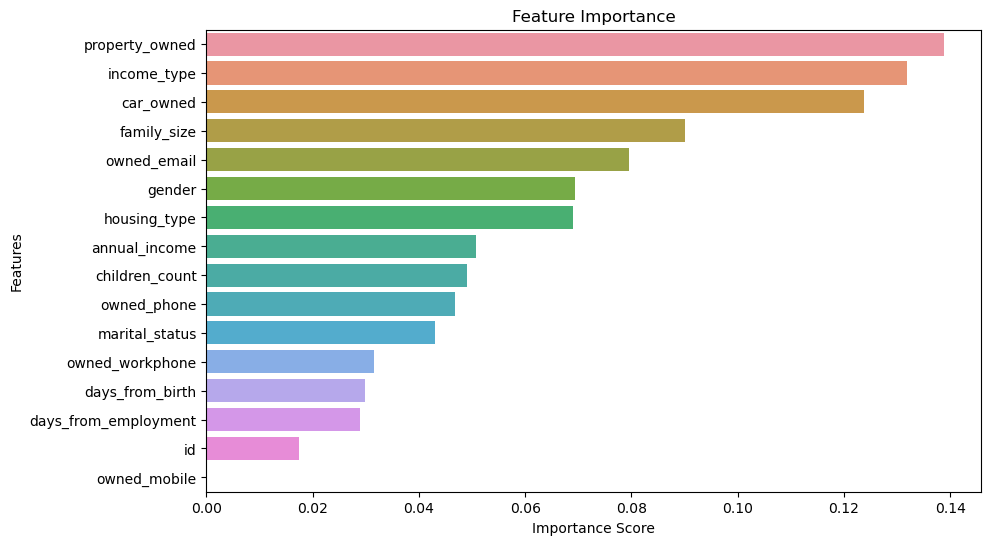

In [79]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Create an instance of the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Get feature importance scores
importance_scores = xgb_model.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance_scores})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [93]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create an instance of the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predict the labels for the test data
y_pred = xgb_model.predict(X_test_balanced)

# Generate the classification report
report = classification_report(y_test_balanced, y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2806
           1       0.99      0.88      0.93      2806

    accuracy                           0.93      5612
   macro avg       0.94      0.93      0.93      5612
weighted avg       0.94      0.93      0.93      5612

